In [2]:
import matplotlib.pyplot as plt
import scipy.stats as sts
from tqdm import tqdm
import numpy as np

In [3]:
# clarification: contraction rv means random variable
probability_mapping = lambda oracle_flg: 0.5 + 0.4 * oracle_flg


def experiment_generator(num_experiments, num_of_participants, k):
    for _ in range(num_experiments):
        is_oracle_rv = sts.bernoulli.rvs(10**-3, size=num_of_participants)
        coin_trial_outcome = sts.binom.rvs(k, probability_mapping(is_oracle_rv))
        yield is_oracle_rv[np.argmax(coin_trial_outcome)]

In [4]:
num_experiments = 10_000
oracle_proba_for_selected_k = (
    lambda k: sum(experiment_generator(num_experiments, num_of_participants=100, k=k))
    / num_experiments
)
oracle_proba_for_selected_k(100)

np.float64(0.0991)

In [5]:
results_for_k = [oracle_proba_for_selected_k(k) for k in tqdm(range(1, 1000, 20))]

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:50<00:00,  1.02s/it]


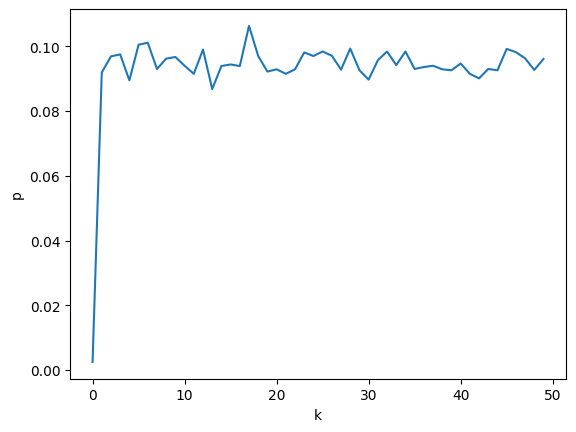

In [7]:
plt.plot(results_for_k)
plt.xlabel("k")
plt.ylabel("p")
plt.savefig("../static/task1/prior_k.png")